## MSiA 422 – FALL 2019
### Project #1
### Submitted by:
    - Shreyashi Ganguly

## Exercise 1 – BABY NAMES by STATE and YEAR

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#For removing matplotlib version warning messages from the notebook
import warnings
warnings.filterwarnings('ignore')

### Defining a dictionary of US State Names

In [2]:
# An US state dictionary
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

### Library class called "BabyNames"
Contains following functions:<br>
    - contructor: to pass path to dataset
    - read: for reading in the statewise text files
    - Count: counts number of births by state and/or year
    - Top10BabyNames: returns the top 10 most used names for boys and girls
    - ChangeOfPopularity: returns the top names that have seen a spike, drop or no change in popularity in a certain user provided time period
    - Top5NamesPerYear: returns the top 5 ranking names in each state in a given year for a given gender or both genders
    - NamePopularityPlot: for a given name, state, gender and time period this function plots the movement in the proportion use of the name in the given time period
    - NameFlip: name flips are essentially names that switched sides in popularity between males and females. This function returns the top n names that have seen major difference in their popularity between males and females between the first and last year of their use.
    - interesting_story: this function depicts an interesting observation from the dataset

In [2]:
class BabyNames:
    '''
    Constructor where you pass the file location to create Pandas DataFrame.
    
    User Input:
    Path to the folder containing state wise .txt files with baby names
    '''
    def __init__(self,path):
        self.path=path
        self.states=['AK','AL', 'AR', 'AZ', 'CA', 'CO', 'CT','DC','DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
                    'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
                    'WV', 'WY']
    
    def read(self):
        '''
        Read in the file
        Goes into the path specified in constructor and reads in the .txt file corresponding to the state
        
        Output: dataframe with year-wise names for all states appended
        '''
        columns = ['state','sex','year','name','births']
        newlist=[]
        for s in self.states:
            full_path = os.path.join(self.path, s+'.TXT')
            df = pd.read_csv(full_path,names=columns)
            newlist.append(df)
        names=pd.concat(newlist,ignore_index = True)
        return names
    
    def Count(self,state='',year=''):
        '''
        Returns the total number of birth by state or year or both.
        A blank state or year should return all births of the empty input.
        
        User Input:
        State - e.g. 'IL' for Illinois
        Year - e.g. 1990
        
        Output:
        Total number of births in the given state in the given year
        '''
        
        #Calling read function to create names dataframe
        dataset = BabyNames(r'./namesbystate').read()
        
        #Group the dataset by state/year 
        result=dataset.groupby(['state','year'], as_index = False).sum()
        result_year=dataset.groupby(['year'], as_index=False)['births'].sum()
        result_state=dataset.groupby(['state'],as_index=False)['births'].sum()
        
        #If year IS supplied but NOT state
        if state=='' and year!= '':
            final=result_year[(result_year.year==year)]
        
        #If state IS supplied but NOT year
        elif year==''and state!='':
            final=result_state[(result_state.state==state)]
            
        #If NONE are supplied - returns total number of births in the data
        elif year==''and state=='':
            final=result['births'].sum()
            
        #If BOTH are supplied
        else: 
            final= result[(result.year==year) & (result.state==state)]
        
        return final
    
    def Top10BabyNames(self,state, year):
        '''
        Return the dataframe of the 10 most popular baby names, with columns of Rank, Male and Female
        
        User Input:
        state - e.g. 'CA' for California
        year - e.g. 1990
        
        Output:
        Top 10 most popular names by Gender in the given state and year.
        If state/year are not supplied, the function summarises only on the non missing argument
        If both state & year are not supplied, the function summarises on the whole data
        '''
        
        #Calling read function to create names dataframe
        df=BabyNames(r'./namesbystate').read()
        
        #Summarising frequency of names for males and females
        
        #If year IS supplied but NOT state
        if state=='' and year!= '':
            result=df[(df.year==year) & (df.sex=='F')].groupby(['year','name'], as_index=False).sum().sort_values(by='births',ascending=False)
            result1=df[(df.year==year) & (df.sex=='M')].groupby(['year','name'],as_index=False).sum().sort_values(by='births',ascending=False)
        
        #If state IS supplied but NOT year
        elif year=='' and state!='':
            result=df[(df.state==state) & (df.sex=='F')].groupby(['state','name'],as_index=False).sum().sort_values(by='births',ascending=False)
            result1=df[(df.state==state) & (df.sex=='M')].groupby(['state','name'],as_index=False).sum().sort_values(by='births',ascending=False)
        
        #If NONE are supplied
        elif year=='' and state=='':
            result=df[df.sex=='F'].groupby(['name'],as_index=False).sum().sort_values(by='births',ascending=False)
            result1=df[df.sex=='M'].groupby(['name'],as_index=False).sum().sort_values(by='births',ascending=False)
        
        #If BOTH are supplied
        else: 
            result=df[(df.state==state) & (df.year==year) & (df.sex=='F')].sort_values(by='births',ascending=False)
            result1= df[(df.state==state) & (df.year==year) & (df.sex=='M')].sort_values(by='births',ascending=False)
        
        # Modify column names
        result_female=result.rename(columns = {'name':'Female'})
        result_male=result1.rename(columns = {'name':'Male'})
        Female=result_female.Female
        Male=result_male.Male
        new=pd.concat([Male.reset_index(), Female.reset_index()], axis=1)[['Male','Female']]
        # Reset index for the dataframe
        new.index= [i for i in range(1,len(new)+1)]
        new.index.name = 'Rank'
        return new[:10]
        
    
    def ChangeOfPopularity(self,fromYear=2014, toYear=2015, top=10):
        '''
        Returns i. Names that increased in popularity 
                ii. Names that decreased in popularity 
                iii. Names having the same popularity
        
        User Input:
        fromYear - base year, defaulted to 2014
        toYear - comparison year, defaulted to 2015
        top - number of ranks interested in, defaulted to 10
        
        Output:
        Dataframe with columns showing names whose popularity saw,
            i. Highest decrease
            ii. Highest increase
            iii. No change
        '''
        #Calling read function to create names dataframe
        df=BabyNames(r'./namesbystate').read()
        
        #Summarising baby name frequencies in the 'from' year 
        result_from=df[(df.year==fromYear)].groupby(['name','year'],as_index=False).sum()[['name','births']]
        
        #Summarising baby name frequencies in the 'to' year 
        result_to=df[(df.year==toYear)].groupby(['name','year'],as_index=False).sum()[['name','births']]
        
        #Merge the result_from and result_to dataframes by name 
        merged_inner = pd.merge(left=result_from,right=result_to, left_on='name', right_on='name')
        
        #Calculate the percentage change of births that correspond to each name
        merged_inner['diff']=(merged_inner.births_y-merged_inner.births_x)/merged_inner.births_x
        
        #Names with decrease in popularity
        decrease=merged_inner.sort_values(by='diff',ascending=True)
        decrease.index= [i for i in range(1,len(decrease)+1)]
        
        #Names with increase in popularity
        increase=merged_inner.sort_values(by='diff',ascending=False)
        increase.index= [i for i in range(1,len(increase)+1)]
        
        #Names with no Change in popularity
        same=merged_inner[(merged_inner['diff']==0)]
        same.index= [i for i in range(1,len(same)+1)]
        
        # Select top n names 
        final=pd.concat([decrease[:top]['name'],increase[:top]['name'], same[:top]['name']], axis=1)
        final.columns=['decrease','increase','same']
        
        return final
                
    def Top5NamesPerYear(self,year=2015,sex=''):
        '''
        Returns a table that shows the five most frequent given names, 
        by State, for male, female, or both in a given year.
        
        User Input:
        year - e.g. 2010
        sex - 'M' or 'F'
        
        Output:
        Statewise top 5 name choices for males/females/both (as specified by user) together with their frequencies
        '''

        #Calling read function to create names dataframe
        df=BabyNames(r'./namesbystate').read()

        #If sex is not passed - results summarised over both genders
        if sex=='':
            result2=df[(df.year==year)].groupby(['name','state'], as_index=False).sum().sort_values(by=['state','births'],ascending=False)
        
        #Else considering only the sex of interest
        if sex!='':  
            result2=df[(df.sex==sex) & (df.year==year)].groupby(['name','state'], as_index=False).sum().sort_values(by=['state','births'],ascending=False)
        
        #Create an empty dataframe
        dfObj = pd.DataFrame(columns=['name', 'state','year', 'births'])
        new=[]
        for i in self.states:
            # Select the top 5 values, and collapse the array into one dimension
            final=list(np.array(result2[(result2.state==i)][:5][['state','name','births']]).flatten())
            new.append(final)
        # Append the list to the empty dataframe
        dfObj = pd.DataFrame(new)
        final=dfObj.iloc[:, [0,1,2,4,5,7,8,10,11,13,14]]
        final.columns = ['State', 'Rank1', 'Num','Rank2','Num', 'Rank3','Num', 'Rank4', 'Num', 'Rank5', 'Num']
        
        # Convert states from abbreviation to full name 
        full = list(final.State)
        for (i, state_fn) in enumerate(full):
            if state_fn in states:
                full[i]=states[state_fn]
        
        final['State']=full
        return  final


    def NamePopularityPlot(self, name ='Mary', yearRange=(2000,2015), state='IL', sex='F'):
        '''
        Creates a plot file that shows the name popularity changes over the year
        
        User Input:
        name - any name of interest, e.g. 'Mary'. Defaulted to 'Jim'
        yearRange - years between which user is interested in checking popularity. Defaulted to (2000,2015)
        state - defaulted to 'IL'
        sex - 'M' or 'F'. Defaulted to 'M'
        
        Output:
        A line plot tracking changes in name popularity over the years
        '''
        
        #Calling read function to create names dataframe
        ds=BabyNames(r'./namesbystate').read()
        
        #Defining function add_prop to calculate proportion of the use of each name
        def add_prop(group):
            group['prop'] = group.births / group.births.sum()
            return group
        
        #Calculating year and state wise proportion of name use
        df = ds.groupby(['year','state']).apply(add_prop)
        
        #Filtering out name, gender, state and years of interest
        result3=df[(df.name == name)& (df.sex==sex)& (df.state==state)& (df.year >= yearRange[0]) & (df.year <=yearRange[1])] 

        #Creating Plot 
        ax = plt.gca()
        fig=plt.figure(figsize=(8, 8))
        result3.plot(kind='line',x='year',y='prop', ax=ax, title=name)
        fig.show()

    
    def NameFlip(self, n=10):
        '''
        List top n names that filliped over the years. 
        Provide a plot of the names showing the year.
        
        User Input:
        n - number of ranks interested in, defaulted as 10
        
        Output:
        The top n names that flipped
        
        *A name flip is defined as follows:
        For each name common to males and females, 
        Male popularity - Proportion of male babies having this name in a given year
        Female popularity - Proportion of female babies having this name in a given year
        Difference in popularity for males and females is computed for each of the common names for each year
        
        If between the first and last year, this difference has flipped sign, i.e., names that were more commonly 
        used among males in the first year are more commonly used for females in the last year -> these names are
        declared to have been flipped!
        '''
        
        #Calling read function to create names dataframe
        df=BabyNames(r'./namesbystate').read()
        
        #Male name popularity - year wise
        male=df[(df.sex=='M')].groupby(['name','year'],as_index=False).sum()[['name','year','births']]. rename(columns = {'births':'male_births'})
        
        #Female name popularity - year wise
        female=df[(df.sex=='F')].groupby(['name','year'], as_index=False).sum()[['name','year','births']].rename(columns = {'births':'female_births'})
        
        #Merge female and male dateframes on name and year to find the names common to boys and girls
        merged_df = male.merge(female, how = 'inner', on = ['name', 'year'])
        
        #Find out the percentage of a common name in males and females
        merged_df['male_prop']=merged_df.male_births/(merged_df.male_births+merged_df.female_births)
        merged_df['female_prop']=merged_df.female_births/(merged_df.male_births+merged_df.female_births)
        
        #Difference in popularity of common names between males and females
        merged_df['diff']= merged_df['male_prop']-merged_df['female_prop']
        
        #Include the names that appear more than once 
        final=merged_df[merged_df.groupby('name').name.transform('count') > 1]
        
        #Select the first and the last time each name appears in the dataframe
        new=final.groupby('name')['diff'].agg({'result1' : 'first', 'result2' : 'last'})
        
        #If the proportion difference has different signs in the first and last years, the name is flipped
        flip=new[(new.result1*new.result2 <0)]
        flip['prop_diff'] = flip.result2-flip.result1
        flip_sort= flip.sort_values(by='prop_diff')
        
        # Create a dataframe that the top n flipped names  
        flipnames = pd.concat([pd.Series(flip_sort[:n].index),
                            pd.Series(flip_sort[-n:].index[::-1])], 
                               axis=1)
        flipnames.columns=['female to male', 'male to female']
        
        # Plot 
        fig = plt.figure(figsize=(10,15))
        for i, j in enumerate(['female to male', 'male to female']):
            ax = fig.add_subplot(2, 1, i+1)
            for name in flipnames[[j]].values:
                name = name[0]
                name_table = final[final['name']==name]
                x = name_table[['year']].values.tolist()
                y = name_table[['female_prop']].values.tolist()
                ax.set_title(j)
                ax.plot(x, y, label=name)
            ax.legend()
        fig.show()       
        return flipnames

    def interesting_story(self):
        """
        This function depicts an interesting observation from the baby names dataset

        It was observed that some people had slightly unimaginative names for their babies,
        in the sense, they were naming their babies exactly that - Baby!
        Or slight variants - Babygirl, Babyboy, Infant

        Upon digging deeper, it turned out that this trend saw a major spike around 1989

        Does this mean laziness spiked in the 1990s?....
        Well with the internet coming into people's lives, can we really blame them!
        """

        # Read in the dataset 
        dataset = BabyNames(r'./namesbystate').read()

        #Yearly sums of names
        names = dataset.groupby(['year','name'])['births'].sum().reset_index()

        #Names that had the word 'baby' in them
        baby = names[names['name'].str.lower().str.contains('baby')].reset_index()[['year','name','births']]

        #Names that had the word 'infant' in them
        infant = names[names['name'].str.lower().str.contains('infant')].reset_index()[['year','name','births']]

        #Combining 'baby' and 'infant' names into one dataframe - lazy_names!
        baby_names = pd.merge(baby,infant,
                          how = 'outer',
                          left_on = 'year',
                         right_on = 'year').fillna(0)[['year','births_x','births_y']]
        baby_names['births'] = baby_names['births_x'] + baby_names['births_y']
        lazy_names = baby_names[['year','births']].groupby('year')['births'].sum().reset_index()

        year_list = pd.DataFrame(list(range(1910,2018))) #placeholder for all years from 1910 to 2018. Used for plotting
        year_list.columns = ['year']
        lazy_names = pd.merge(year_list,lazy_names,
                              how = 'outer',
                              left_on = 'year', right_on = 'year').fillna(0)

        #Plotting
        plt.style.use('dark_background')
        plt.figure(figsize=(8,8))
        plt.plot(lazy_names['year'], lazy_names['births'], color = 'cyan')
        plt.plot(lazy_names['year'][79:90], lazy_names['births'][79:90], lw=10, c='yellow', alpha=0.5, zorder=-1)
        plt.xlabel('Year', fontsize=15)
        plt.ylabel('Lazy Names', fontsize=15)
        plt.figtext(.15, .7, "Lazy Names: baby, babygirl, babyboy, infant", fontsize=12)
        plt.title('Did Laziness peak in the 90s or Was it the Dawn of the Internet?',fontweight='bold',fontsize=20,fontname="Comic Sans MS")
        plt.show();
        

### Initiating class BabyNames

In [3]:
baby = BabyNames(r'./namesbystate')

In [4]:
#data = baby.read()
data.to_csv('output.csv', encoding='utf-8', index=False)

NameError: name 'data' is not defined

### Calling function Count()
Returns the total number of birth by state or year or both.
A blank state or year should return all births of the empty input.

User Input:<br>
State - e.g. 'IL' for Illinois<br>
Year - e.g. 1990

Output:<br>
Total number of births in the given state in the given year

In [26]:
state = str(input("State:"))
year_str = input("Year:")
if year_str == '':
    year = ''
else:
    year = int(year_str)

baby.Count(state,year)

State:CA
Year:1990


,state,year,births
512,CA,1990,552423


### Calling function Top10BabyNames()
Return the dataframe of the 10 most popular baby names, with columns of Rank, Male and Female

User Input:<br>
state - e.g. 'CA' for California<br>
year - e.g. 1990

Output:<br>
Top 10 most popular names by Gender in the given state and year<br>
If state/year are not supplied, the function summarises only on the non missing argument<br>
If both state & year are not supplied, the function summarises on the whole data<br>

In [30]:
state = str(input("State:"))
year_str = input("Year:")
if year_str == '':
    year = ''
else:
    year = int(year_str)

baby.Top10BabyNames(state,year)

State:IL
Year:2015


,Male,Female
Rank,,
1,Noah,Olivia
2,Liam,Emma
3,Alexander,Sophia
4,Jacob,Mia
5,Michael,Isabella
6,Benjamin,Ava
7,William,Sofia
8,Daniel,Abigail
9,Mason,Emily


### Calling function ChangeOfPopularity()
Returns
    - Names that increased in popularity
    - Names that decreased in popularity 
    - Names having the same popularity

User Input:<br>
fromYear - base year, defaulted to 2014<br>
toYear - comparison year, defaulted to 2015<br>
top - number of ranks interested in, defaulted to 10

Output:<br>
Dataframe with columns showing names whose popularity saw,
    - Highest decrease
    - Highest increase
    - No change

In [41]:
fromYear = input("Starting Year:")
toYear = input("Ending Year:")
top = input("# of Top Ranks to return:")

if fromYear == '' or toYear == '' or top == '':
    print(baby.ChangeOfPopularity())
else:
    print(baby.ChangeOfPopularity(int(fromYear),int(toYear),int(top)))

Starting Year:1990
Ending Year:2015
# of Top Ranks to return:15
    decrease increase      same
1     Infant    Aiden     Aaren
2   Brittney   Jayden  Anamarie
3       Jill  Bentley  Angelika
4      Kelli     Zoey    Anisha
5      Ebony    Ryder     Annel
6   Casandra  Paisley  Antonios
7     Ashlie   Willow    Anyssa
8    Kristin    Ryker       Ara
9       Jodi   Sawyer     Arial
10   Lyndsey   Easton    Assata
11   Felicia    Rowan   Audelia
12    Brandy   Matteo  Aurielle
13    Tracey    Norah    Bushra
14    Stacie    Jayce    Carmel
15    Meagan   Hudson  Carolyne


### Calling function Top5NamesPerYear()
Returns a table that shows the five most frequent given names, by State, for male, female, or both in a given year.

User Input:<br>
year - e.g. 2010<br>
sex - 'M' or 'F'

Output:<br>
Statewise top 5 name choices for males/females/both (as specified by user) together with their frequencies

In [80]:
sex = str(input("Gender (M or F):"))
year_str = int(input("Year (between 1910 & 2018):"))

baby.Top5NamesPerYear(year,sex)

Gender (M or F):M
Year (between 1910 & 2018):1915


,State,Rank1,Num,Rank2,Num,Rank3,Num,Rank4,Num,Rank5,Num
0,Alaska,Liam,53,Noah,48,James,46,William,44,Oliver,41
1,Alabama,William,413,James,322,John,318,Mason,294,Elijah,279
2,Arkansas,William,197,Elijah,172,Mason,171,Noah,169,James,146
3,Arizona,Noah,445,Liam,414,Alexander,370,Michael,347,Ethan,341
4,California,Noah,2767,Jacob,2556,Ethan,2477,Daniel,2472,Matthew,2437
5,Colorado,Liam,306,William,276,Jackson,271,Alexander,256,Oliver,256
6,Connecticut,Noah,216,Mason,211,Alexander,188,Liam,184,Benjamin,178
7,District of Columbia,William,78,Henry,75,James,68,Alexander,64,Jacob,62
8,Delaware,Liam,60,Mason,60,Noah,60,Jackson,53,Michael,51
9,Florida,Liam,1279,Noah,1239,Jacob,1005,Mason,990,Ethan,970


### Calling function NamePopularityPlot()
Creates a plot file that shows the name popularity changes over the year

User Input:<br>
name - any name of interest, e.g. 'Mary'<br>
yearStart - starting year, e.g. 1990<br>
yearEnd - ending year, e.g. 2010<br>
state - e.g. 'IL'<br>
sex - 'M' or 'F'<br>

Output:<br>
A line plot tracking changes in name popularity over the years<br>
If the given name is not found in the given state within the given time period, a blank plot is returned

Name (First character capital):Amy
Start Year (between 1910 & 2018):1910
End Year (between 1910 & 2018 and after yearStart):2018
State :IL
Gender :F


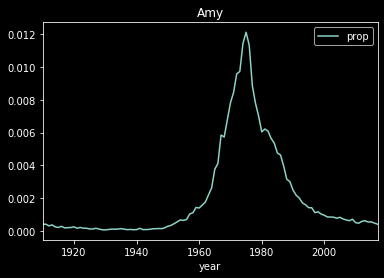

<Figure size 576x576 with 0 Axes>

In [75]:
name = str(input("Name (First character capital):"))
yearStart = int(input("Start Year (between 1910 & 2018):"))
yearEnd = int(input("End Year (between 1910 & 2018 and after yearStart):"))
state = str(input("State :"))
sex = str(input("Gender :"))

baby.NamePopularityPlot(name,(yearStart,yearEnd),state,sex)

### Calling function NameFlip()
List top n names that filliped over the years. 
Provide a plot of the names showing the year.

User Input:<br>
n - number of ranks interested in

Output:<br>
The top n names that flipped

*A name flip is defined as follows:<br>
For each name common to males and females, <br>
Male popularity - Proportion of male babies having this name in a given year<br>
Female popularity - Proportion of female babies having this name in a given year<br>
Difference in popularity for males and females is computed for each of the common names for each year

If between the first and last year, this difference has flipped sign, i.e., names that were more commonly 
used among males in the first year are more commonly used for females in the last year -> these names are
declared to have been flipped!

n (for Top Ranks):10


,female to male,male to female
0,Addison,Gerry
1,Leslie,Jean
2,Sydney,Artie
3,Charley,Robbie
4,Blair,Germaine
5,Stevie,Donnie
6,Aubrey,Mikah
7,Skylar,Callan
8,Lauren,Kyrie
9,Lindsey,Lennie


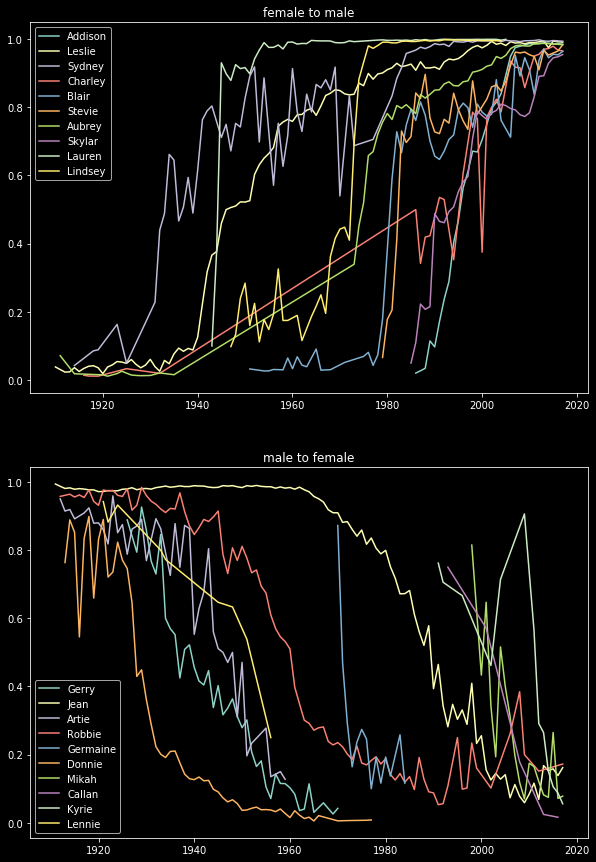

In [76]:
n = input("n (for Top Ranks):")
if n == '':
    n = 1
else:
    n = int(n)

baby.NameFlip(n)

### An interesting observation from the data
It was observed that some people had slightly unimaginative names for their babies,
in the sense, they were naming their babies exactly that - Baby!<br>
Or slight variants - Babygirl, Babyboy, Infant

Upon digging deeper, it turned out that this trend saw a major spike around 1989

Does this mean laziness spiked in the 1990s?....<br>
Well with the internet coming into people's lives, can we really blame them!

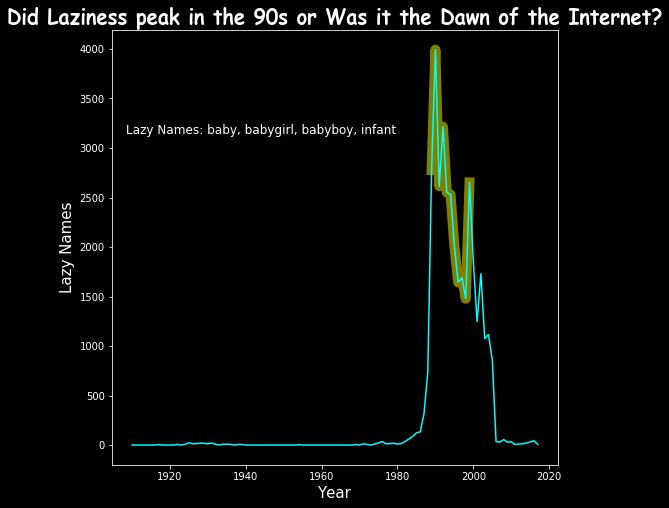

In [69]:
baby.interesting_story()